In [1]:
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import skimage.transform

In [2]:
def load_image(x, new_h=299, new_w=299):
    image = Image.open(x)
    h, w = image.size
    if image.format != "PNG":
        image = np.asarray(image)/255.0
    else:
        image = np.asarray(image)/255.0
        image = image[:,:,:3]
    '''
    if w == h:
        resized = cv2.resize(image, (new_h,new_w))
    elif h < w:
        resized = cv2.resize(image, (int(w * float(new_h)/h), new_w))
        crop_length = int((resized.shape[1] - new_h) / 2)
        resized = resized[:,crop_length:resized.shape[1] - crop_length]
    else:
        resized = cv2.resize(image, (new_h, int(h * float(new_w) / w)))
        crop_length = int((resized.shape[0] - new_w) / 2)
        resized = resized[crop_length:resized.shape[0] - crop_length,:]
    '''
    return cv2.resize(image, (new_h, new_w))

In [3]:
def load_image2(path):
    img = np.array(Image.open(path))
    img = img / 255.0
    #assert (0 <= img).all() and (img <= 1.0).all()
    #short_edge = min(img.shape[:2])
    #yy = int((img.shape[0] - short_edge) / 2)
    #xx = int((img.shape[1] - short_edge) / 2)
    #crop_img = img[yy: yy + short_edge, xx: xx + short_edge]
    resized_img = skimage.transform.resize(img, (299, 299, 3))
    return resized_img

In [4]:
def load_image3(x, new_h=299, new_w=299):
    image = Image.open(x)
    h, w = image.size
    if image.format != "PNG":
        image = np.asarray(image)/255.0
    else:
        print "here"
        image = np.asarray(image)/255.0
        image = image[:,:,:3]
        print image.shape
    
    if w == h:
        resized = cv2.resize(image, (new_h,new_w))
    elif h < w:
        resized = cv2.resize(image, (int(w * float(new_h)/h), new_w))
        crop_length = int((resized.shape[1] - new_h) / 2)
        resized = resized[:,crop_length:resized.shape[1] - crop_length]
    else:
        resized = cv2.resize(image, (new_h, int(h * float(new_w) / w)))
        crop_length = int((resized.shape[0] - new_w) / 2)
        resized = resized[crop_length:resized.shape[0] - crop_length,:]
    
    return cv2.resize(resized, (new_h, new_w))

In [5]:
def build_prepro_graph():
    input_file = tf.placeholder(dtype=tf.string)
    image_file=tf.read_file(input_file)
    fts = tf.image.decode_jpeg(image_file, channels=3)
    output = tf.image.resize_images(fts, [299,299])/255.0
    output = tf.reshape(output,[1, 299, 299, 3])
    return input_file, output

def serve():
    sess = tf.Session()
    init=tf.global_variables_initializer()
    sess.run(init)
    io=build_prepro_graph()
    return sess, io 

def load_image4(sess, io ,image):
    return sess.run(io[1], feed_dict={io[0]:image})

In [6]:
sess, io = serve()

In [19]:
%timeit load_image("../Images/hill.jpg")

1 loop, best of 3: 1.35 s per loop


In [20]:
%timeit load_image2("../Images/hill.jpg")

1 loop, best of 3: 1.7 s per loop


In [21]:
%timeit load_image3("../Images/hill.jpg")

1 loop, best of 3: 1.54 s per loop


In [22]:
%timeit load_image4(sess, io, '../Images/hill.jpg')

1 loop, best of 3: 296 ms per loop


In [11]:
def display_array(arr):
    plt.imshow(arr)
    plt.show()

In [12]:
fts = load_image4(sess, io, '../Images/3.jpg')

In [13]:
resized1 = load_image("../Images/3.jpg")

In [14]:
resized2 = load_image3("../Images/3.jpg")

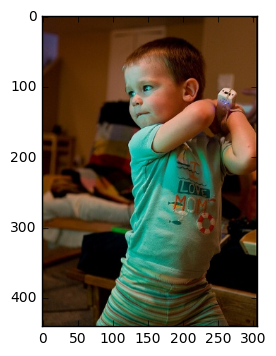

In [15]:
plt.imshow(Image.open("../Images/3.jpg"))
plt.show()

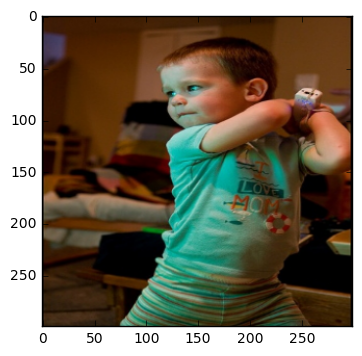

In [16]:
display_array(resized1)

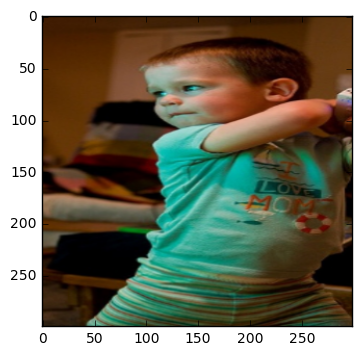

In [17]:
display_array(resized2)

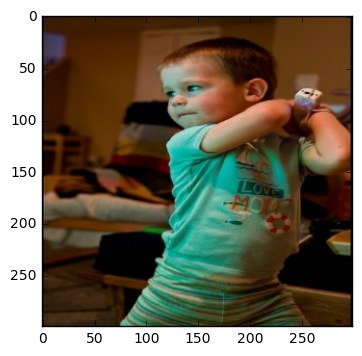

In [18]:
display_array(fts[0])